In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from network_model import *

import sys
#!{sys.executable} -m pip install [arg]
from scipy.stats import gengamma


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [38]:
N = 500

In [39]:
g = nx.powerlaw_cluster_graph(n=N, m=2, p=0.5)

In [61]:
W, I, communities, gamma_pos, success, allocations, C = simulation(
    NUM_AGENTS=N,
    STEPS=100,
    PROJECT_COST=0.5,
    graph=g,
    seed=123,
    use_data=True,
    DEFAULT_A=0.5
)

100 communities.
[0.10095675 0.14875199 0.19466125 0.15209056 0.10550456 0.16813997
 0.0549144  0.11962998 0.15272613 0.12981652 0.17626488 0.08443007
 0.13468512 0.2427988  0.14855951 0.10169893 0.18504441 0.16849163
 0.13459315 0.13553092 0.12486438 0.08380698 0.08928263 0.13509205
 0.12021929 0.15003258 0.15606397 0.17931014 0.1663571  0.10067576
 0.18889096 0.1172347  0.14465051 0.15678634 0.17902403 0.14257927
 0.14706244 0.0775532  0.05756586 0.14805626 0.0804407  0.20061701
 0.21468422 0.15057431 0.05864906 0.18115099 0.17220727 0.0384315
 0.16121923 0.14384442 0.16323916 0.08373731 0.12099628 0.11967316
 0.15434803 0.19045391 0.16686442 0.1221384  0.05836568 0.12313947
 0.10564987 0.11476154 0.14777799 0.08416825 0.0851025  0.19159647
 0.07590459 0.17325406 0.1863968  0.13998733 0.20119756 0.05006479
 0.09853626 0.10599733 0.22938851 0.09533554 0.11095606 0.17683084
 0.19344562 0.08064235 0.18791663 0.07222205 0.103733   0.1792574
 0.04042475 0.10104911 0.17407136 0.24331704 0.

100%|██████████| 100/100 [00:43<00:00,  2.28it/s]


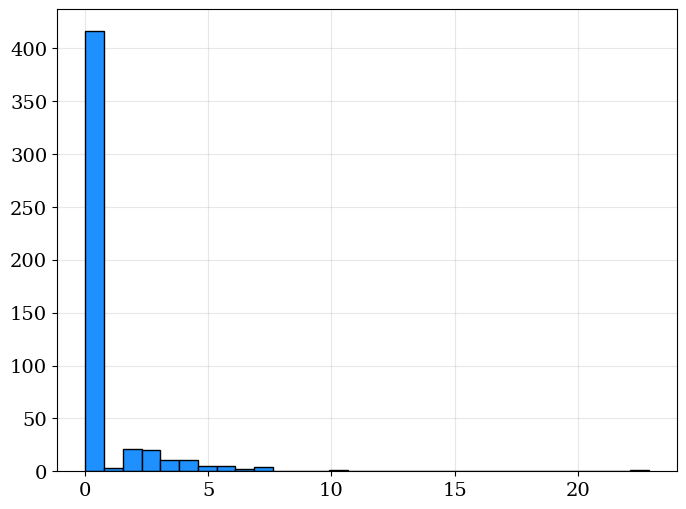

In [65]:
plt.hist(W[-1], bins=30, color="dodgerblue", edgecolor="k")
plt.show()

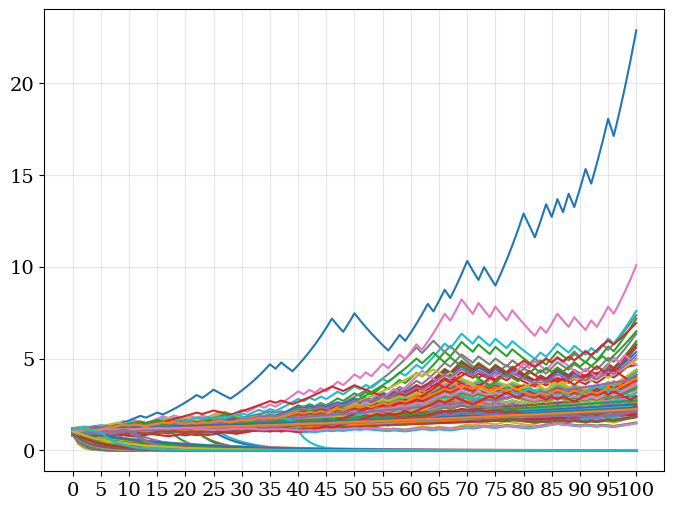

In [63]:
for i in range(W.shape[1]):
    plt.plot(W[:,i])
plt.xticks(np.arange(0, len(W), 5))
plt.show()

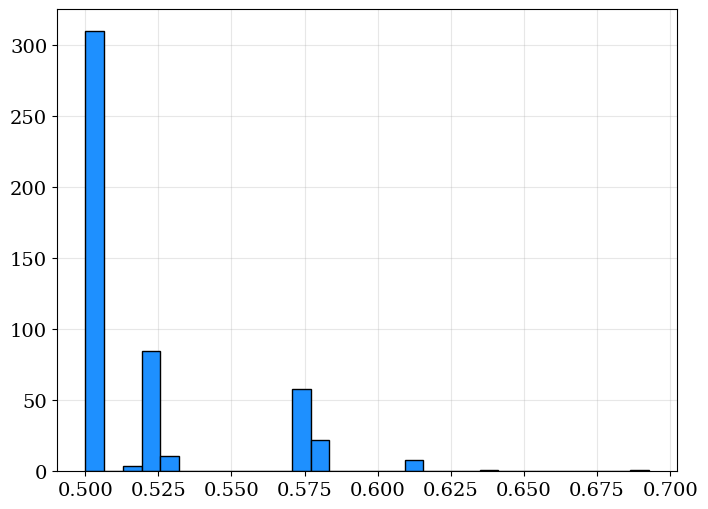

In [64]:
plt.hist(C[-1], color="dodgerblue", edgecolor="k", bins=30)
plt.show()

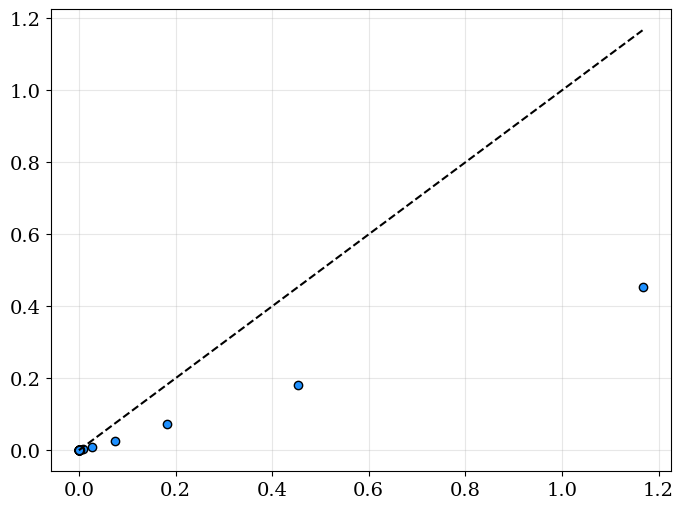

In [13]:
i = 10

x=[]
y=[]
for k in range(len(W)-1):
    x.append(W[k][i])
    y.append(W[k+1][i])

plt.scatter(x,y, color="dodgerblue", edgecolor="k")
plt.plot(np.linspace(min(x), max(x), 100), np.linspace(min(x), max(x), 100), color="k", linestyle="dashed")
plt.show()